In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.layers import *
from keras.models import *
import matplotlib.pyplot as plt

In [2]:
(train_images,train_labels ), (validation_images,validation_labels)=mnist.load_data()
print("training dataset")
print(train_images.shape)
print(train_labels.shape)
print("validation dataset")
print(validation_images.shape)
print(validation_labels.shape)


11490434/11490434 [==============================] - 2s 0us/step
training dataset
(60000, 28, 28)
(60000,)
validation dataset
(10000, 28, 28)
(10000,)


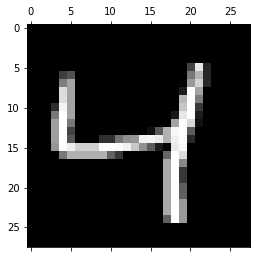

4


In [3]:
plt.matshow(train_images[2],cmap='gray')
plt.show()
print(train_labels[2])

In [4]:
train_images=train_images.reshape((60000,28,28,1))
train_images=train_images.astype("float32")/255
print("before:")
print(train_labels.shape)
print(train_labels[0])
train_labels=to_categorical( train_labels)
print("After")
print(train_labels.shape)
print(train_labels[0])

before:
(60000,)
5
After
(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [5]:
model=Sequential()
model.add(Conv2D(filters=6,kernel_size=5,strides=1,activation="sigmoid",input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Conv2D(filters=16,kernel_size=5,strides=1,activation="sigmoid",input_shape=(14,14,6)))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Flatten())
model.add(Dense(units=120,activation="sigmoid"))
model.add(Dense(units=84,activation='sigmoid'))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [6]:
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

In [7]:
model.fit(train_images,train_labels,epochs=10,batch_size=10,validation_split=0.2)

Epoch 1/10
4800/4800 [==============================] - 26s 4ms/step - loss: 0.5015 - accuracy: 0.8395 - val_loss: 0.1269 - val_accuracy: 0.9622
Epoch 2/10
4800/4800 [==============================] - 18s 4ms/step - loss: 0.1048 - accuracy: 0.9681 - val_loss: 0.0826 - val_accuracy: 0.9758
Epoch 3/10
4800/4800 [==============================] - 18s 4ms/step - loss: 0.0749 - accuracy: 0.9765 - val_loss: 0.0769 - val_accuracy: 0.9768
Epoch 4/10
4800/4800 [==============================] - 19s 4ms/step - loss: 0.0594 - accuracy: 0.9814 - val_loss: 0.0699 - val_accuracy: 0.9798
Epoch 5/10
4800/4800 [==============================] - 19s 4ms/step - loss: 0.0484 - accuracy: 0.9846 - val_loss: 0.0587 - val_accuracy: 0.9822
Epoch 6/10
4800/4800 [==============================] - 19s 4ms/step - loss: 0.0411 - accuracy: 0.9867 - val_loss: 0.0619 - val_accuracy: 0.9819
Epoch 7/10
4800/4800 [==============================] - 22s 4ms/step - loss: 0.0344 - accuracy: 0.9892 - val_loss: 0.0577 - val_ac